In [10]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Path to your dataset
modified_file_dir= '../data/'
dataset_path = modified_file_dir + 'energy_efficiency_data.csv.'


In [11]:



def save_as(data, modified_file_dir, filename, file_type='csv'):
    '''Save the DataFrame to a file (CSV, Excel, or Pickle).'''
    try:
        # Ensure the directory exists
        if not os.path.exists(modified_file_dir):
            os.makedirs(modified_file_dir)

        # Define the full path for the file
        file_path = os.path.join(modified_file_dir, filename)

        if data is not None:
            if file_type == 'csv':
                data.to_csv(file_path, index=False)
                print(f"Data saved as {file_path}.")
            elif file_type == 'excel':
                data.to_excel(file_path, index=False)
                print(f"Data saved as {file_path}.")
            elif file_type == 'pickle':
                data.to_pickle(file_path)
                print(f"Data saved as {file_path}.")
            else:
                print("Unsupported file type.")
        else:
            print("The provided data is None.")
    except Exception as e:
        print(f"An error occurred: {e}")


In [12]:
# Check if the path is not None and load the dataset
if dataset_path:
    try:
        energy_efficiency_dataset = pd.read_csv(dataset_path)
        print("Dataset loaded successfully!")
        #print(energy_efficiency_dataset.head())  # Display the first few rows
    except FileNotFoundError:
        print(f"File not found at the path: {dataset_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print("Dataset path is None. Please provide a valid path.")



Dataset loaded successfully!


In [13]:
data = energy_efficiency_dataset
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [21]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

y1 = data['Heating Load']
y2 = data['Cooling Load']
X = data.drop(['Heating Load', 'Cooling Load'], axis=1)


X_const = add_constant(X)  # Add constant to account for intercept
vif_data = pd.DataFrame()
vif_data['feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_data)


                     feature           VIF
0                      const  3.231389e+04
1       Relative Compactness  1.055241e+02
2               Surface Area           inf
3                  Wall Area           inf
4                  Roof Area           inf
5             Overall Height  3.120547e+01
6                Orientation  1.000000e+00
7               Glazing Area  1.047508e+00
8  Glazing Area Distribution  1.047508e+00


C:\Users\gogir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


'''
combine Relative Compactness and Surface Area, especially given their strong negative correlation
'''
# Select columns to combine
columns_to_combine = ['Relative Compactness', 'Surface Area']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[columns_to_combine])

# Apply PCA
pca = PCA(n_components=1)
principal_component = pca.fit_transform(X_scaled)

# Add the new component to the dataset
X['Compactness_Surface_Area'] = principal_component

# DROP both columns from dataset

X.drop(['Relative Compactness', 'Surface Area'], axis=1, inplace=True)


X.head()

,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Compactness_Surface_Area
0,294.0,110.25,7.0,2,0.0,0,-2.706558
1,294.0,110.25,7.0,3,0.0,0,-2.706558
2,294.0,110.25,7.0,4,0.0,0,-2.706558
3,294.0,110.25,7.0,5,0.0,0,-2.706558
4,318.5,122.50,7.0,2,0.0,0,-1.777820


In [33]:
# Ensure 'Heating Load' and 'Cooling Load' are included for correlation
data['Compactness_Surface_Area'] = X['Compactness_Surface_Area']  # Add the new column to the original dataset

# Compute correlation
correlation_matrix = data[['Orientation', 'Wall Area', 'Roof Area', 'Compactness_Surface_Area', 'Overall Height', 'Glazing Area', 'Glazing Area Distribution', 'Heating Load', 'Cooling Load']].corr()
print(correlation_matrix)


                            Orientation     Wall Area     Roof Area  \
Orientation                1.000000e+00 -9.490230e-18 -6.086727e-17   
Wall Area                 -9.490230e-18  1.000000e+00 -2.923165e-01   
Roof Area                 -6.086727e-17 -2.923165e-01  1.000000e+00   
Compactness_Surface_Area  -5.936563e-17  2.000471e-01  8.765480e-01   
Overall Height             3.989787e-17  2.809757e-01 -9.725122e-01   
Glazing Area              -9.406007e-16 -8.567455e-17 -1.759011e-15   
Glazing Area Distribution -2.549352e-16  2.067384e-16 -1.078071e-15   
Heating Load              -2.586534e-03  4.556712e-01 -8.618283e-01   
Cooling Load               1.428960e-02  4.271170e-01 -8.625466e-01   

                           Compactness_Surface_Area  Overall Height  \
Orientation                           -5.936563e-17    3.989787e-17   
Wall Area                              2.000471e-01    2.809757e-01   
Roof Area                              8.765480e-01   -9.725122e-01   
Compa

In [37]:
"""
Roof Area: Redundant with "Compactness_Surface_Area."
Orientation: Insignificant correlation with targets and features.
Glazing Area and Glazing Area Distribution: Minimal relevance to the targets.
"""

dropped_features = ['Roof Area', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']

feature_list = X.drop(dropped_features, axis=1)

# Check the features
features = list(feature_list.columns)
print(features)

['Wall Area', 'Overall Height', 'Compactness_Surface_Area']


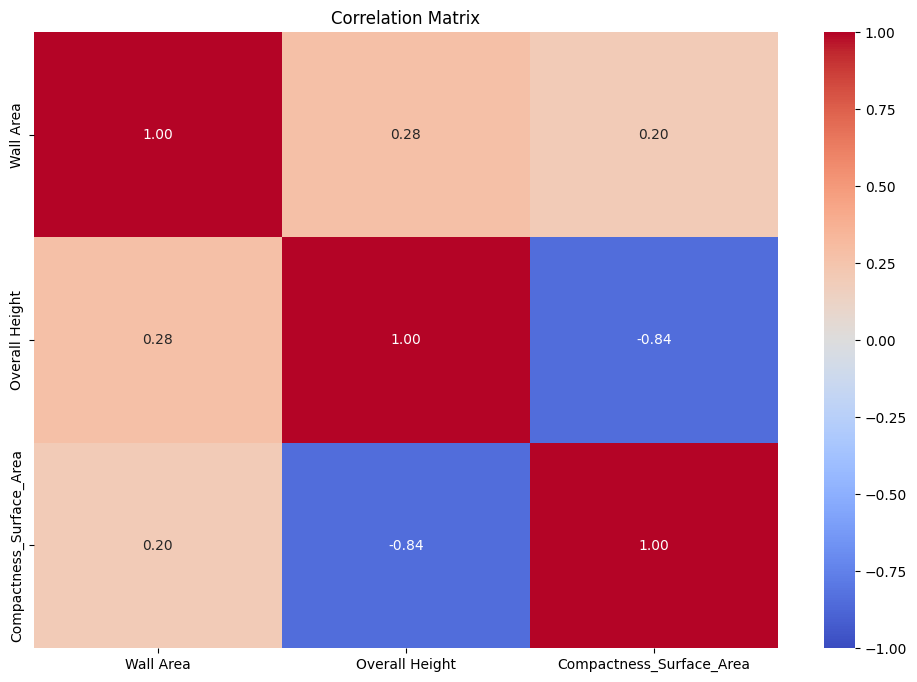

In [38]:
correlation_matrix = feature_list.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

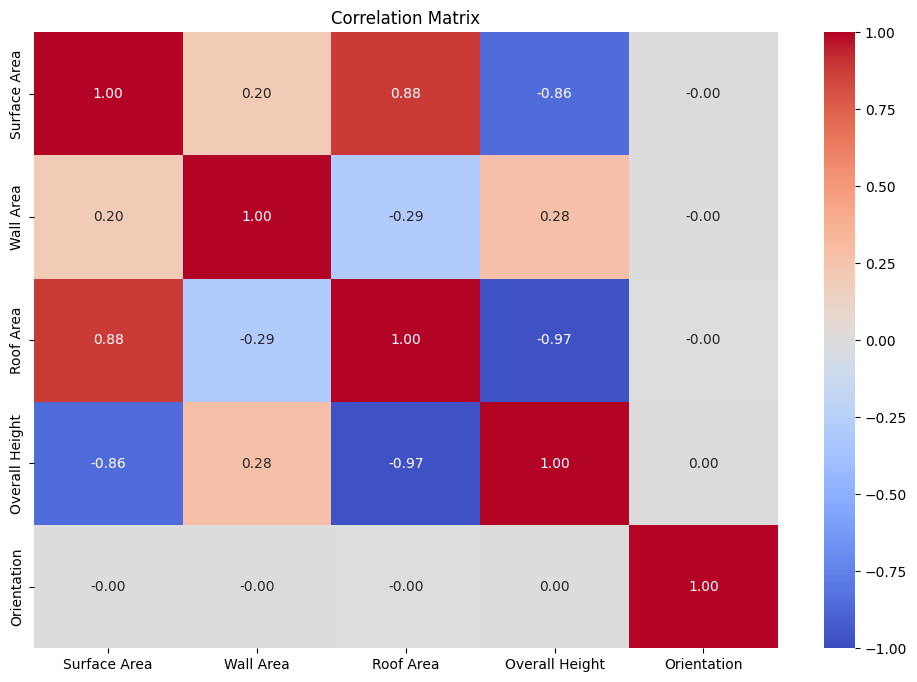

                     feature           VIF
0                      const  3.231389e+04
1       Relative Compactness  1.055241e+02
2               Surface Area           inf
3                  Wall Area           inf
4                  Roof Area           inf
5             Overall Height  3.120547e+01
6                Orientation  1.000000e+00
7               Glazing Area  1.047508e+00
8  Glazing Area Distribution  1.047508e+00


C:\Users\gogir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
